# ECommerce Habits <br>
Mathew Gueon

### Project Description: <br>
This project involves creating visualizations to explore a dataset of eCommerce activity from various regions around the world in 2011. The purpose is to analyze global trends, purchasing behaviors, and sales performance over the course of the year. By visualizing key metrics such as sales volume, customer demographics, and regional activity, the project aims to uncover insights into how different markets contributed to the overall eCommerce landscape. The visualizations will help identify patterns and anomalies, providing a clearer understanding of global eCommerce dynamics during that period.



#### Import all necessary libraries for data visualization

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [54]:
ED = pd.read_csv('c:/CSV_Files/EcommerceData.csv', encoding='ISO-8859-1')
ED.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [55]:
print(ED.shape)
print("Number of rows:", ED.shape[0])
%load_ext autoreload

(541909, 8)
Number of rows: 541909
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Identifying Duplicate Invoice Numbers in the DataFrame

In [56]:
duplicates = ED[ED.duplicated(subset=['InvoiceNo'], keep=False)]
print(duplicates)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

#### Drop all duplicates in the dataframe

In [57]:
#UED = Unique Ecommerce Data
UED = ED.drop_duplicates(subset=['InvoiceNo', 'CustomerID', 'StockCode', 'Country'], keep='first').copy()
print(UED)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

#### Identifying and displaying InvoiceNo values that appear more than once in the dataset.

In [58]:
invoice_counts = UED['InvoiceNo'].value_counts()
reoccuring_invoices = invoice_counts[invoice_counts > 1]
print(reoccuring_invoices)


InvoiceNo
573585     1110
581219      749
581492      731
580729      721
558475      704
           ... 
546876        2
C571233       2
C566611       2
536366        2
581582        2
Name: count, Length: 20006, dtype: int64


#### Grouping the data by InvoiceNo and displaying the InvoiceNo values that occur more than once.

In [59]:
invoice_group = UED.groupby('InvoiceNo').size()
reoccuring_invoices = invoice_group[invoice_group > 1]
print(reoccuring_invoices)


InvoiceNo
536365      7
536366      2
536367     12
536368      4
536370     20
           ..
C581465     4
C581466     5
C581468     2
C581490     2
C581569     2
Length: 20006, dtype: int64


#### Create a calculation for sales generated by each customer

In [60]:
UED['sales'] = UED['Quantity'] * UED['UnitPrice']

In [61]:
print(UED['sales'].head())
UED.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: sales, dtype: float64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


#### Line chart of sales over time of Sales over time(1 Year)

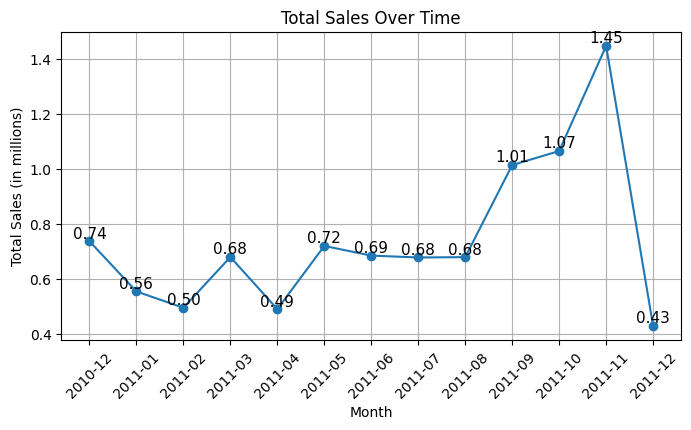

In [62]:
#convert 'InvoiceDate' to datetime
UED['InvoiceDate'] = pd.to_datetime(UED['InvoiceDate'])

sales_data = UED.groupby(UED['InvoiceDate'].dt.to_period('M')).agg({'sales': 'sum'}).reset_index()
#convert period back to string
sales_data['InvoiceDate'] = sales_data['InvoiceDate'].dt.strftime('%Y-%m')

sales_data['sales'] = sales_data['sales'] / 1_000_000  # Convert to millions

#plot total sales over time
plt.figure(figsize=(8, 4))
plt.plot(sales_data['InvoiceDate'], sales_data['sales'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Over Time')
#append each point with the sales value
for i, value in enumerate(sales_data['sales']):
    plt.text(sales_data['InvoiceDate'][i], value, f'{value:.2f}', 
             ha='center', va='bottom', fontsize=11)
plt.xticks(rotation=45)
plt.grid()
plt.show()

The chart above shows the sales period of December 2010 to December 2011. The sales of online purchases stay steady until the end of the year, which coincides with holiday shopping.  
Using this information, online retailers should focus on inventory and sales starting from September to December to maximize profits in the fourth quarter.  

#### Bar chart of the top 10 products with the most sales

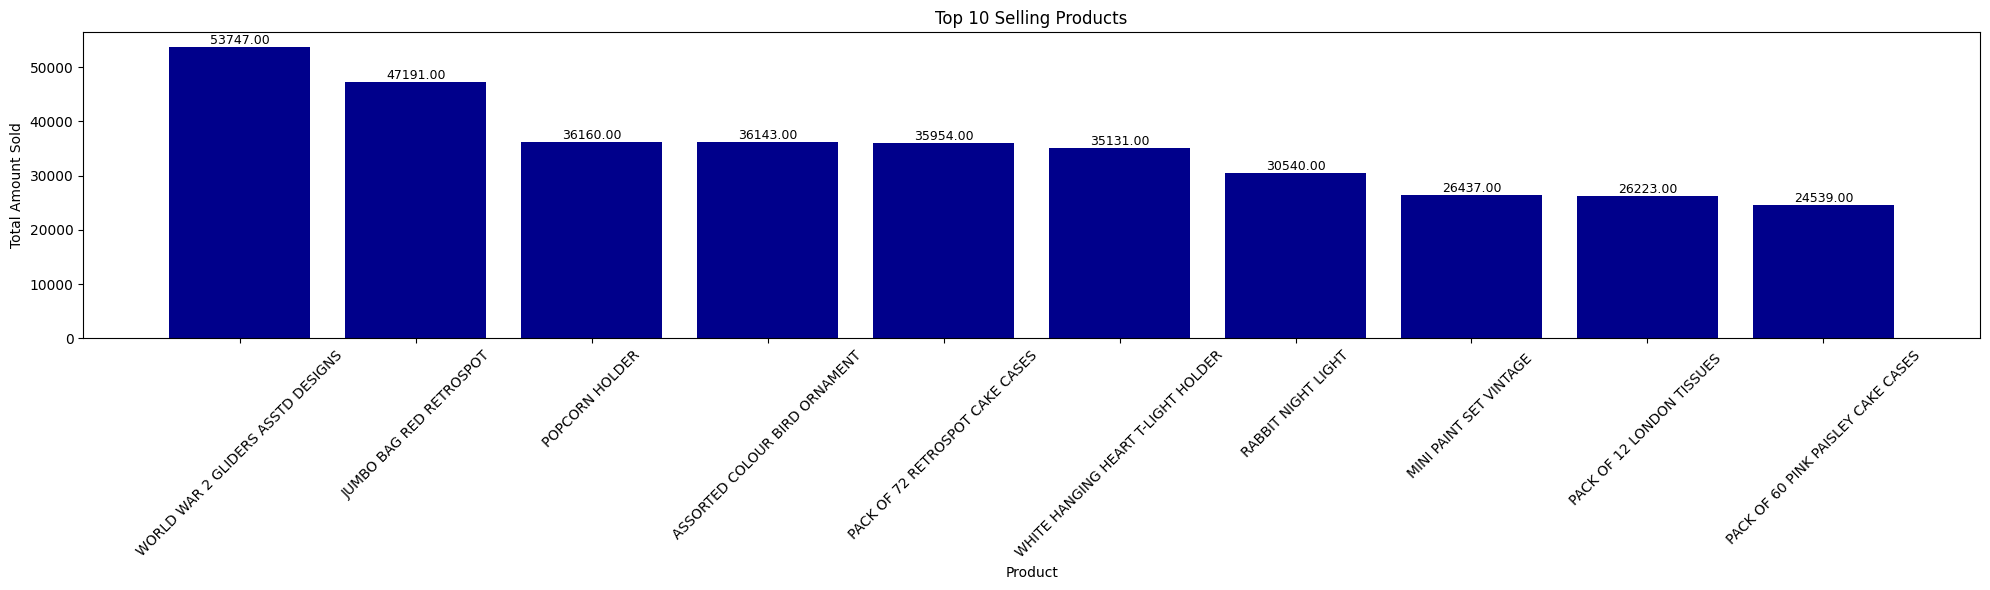

In [63]:
#sum of sales by product description and find top 10 products
top_products = UED.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(20, 6))
plt.bar(top_products['Description'], top_products['Quantity'], color='darkblue')
plt.xlabel('Product')
plt.ylabel('Total Amount Sold')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45)
#add labels to each bar
for i, value in enumerate(top_products['Quantity']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout() 
plt.show()

From this top sale chart, we can infer that the World War 2 Gliders from ASSTD DESIGNS were the highest sold item of the year. Retailers can get insight from this and choose to stock more or less of the top items from this chart.

#### Bar chart of Sales from different Countries to specify which ones have the most engagement.

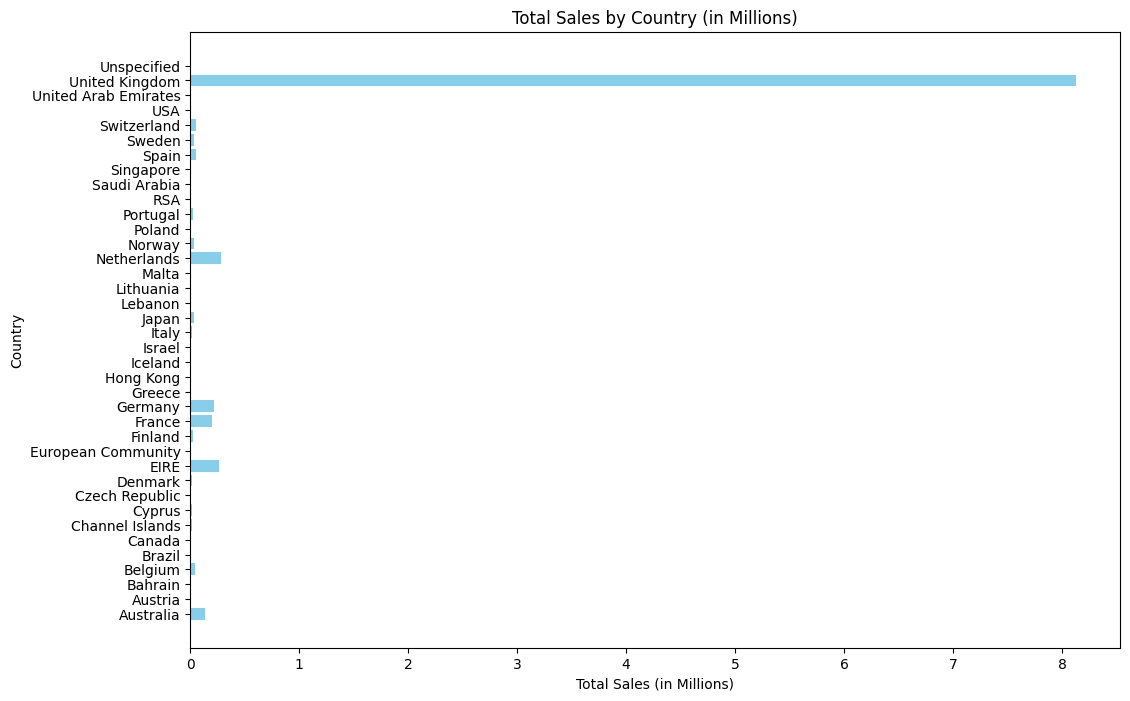

In [64]:
country_sales = UED.groupby('Country')['sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.barh(country_sales['Country'], country_sales['sales'] / 1_000_000, color='skyblue')  # Convert to millions
plt.xlabel('Total Sales (in Millions)')
plt.ylabel('Country')
plt.title('Total Sales by Country (in Millions)')
plt.show()

The United Kingdom has the most buyers. Sales should trend to cater to UK buyers.

#### Heatmap of Buyers during the week and through each hour of the day

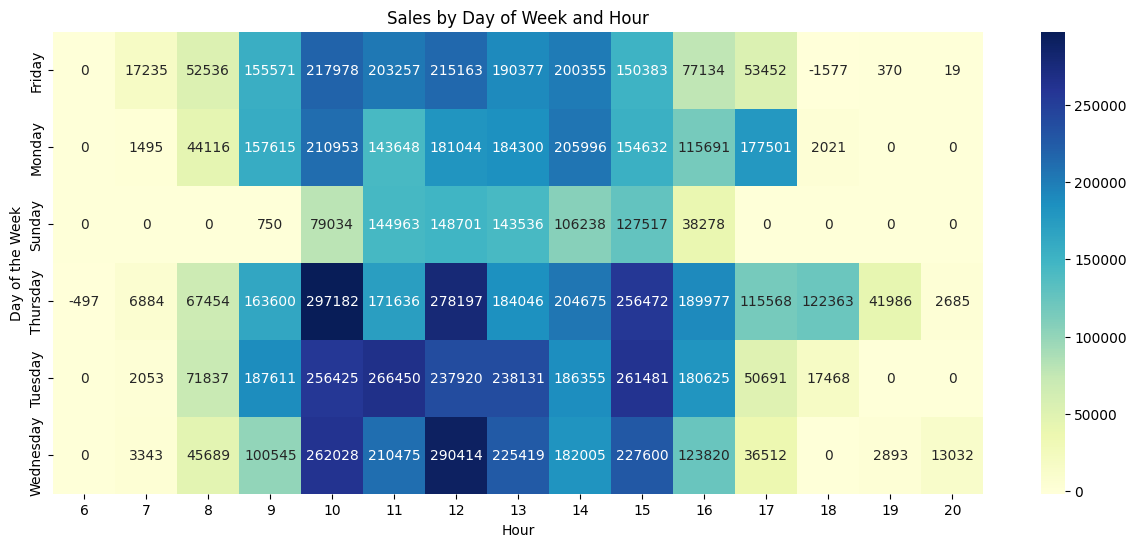

In [65]:
#extract day & hour from 'InvoiceDate'
UED['day_of_week'] = UED['InvoiceDate'].dt.day_name()
UED['hour'] = UED['InvoiceDate'].dt.hour

#create a pivot table and plot the heatmap
heatmap_data = UED.pivot_table(values='sales', index='day_of_week', columns='hour', aggfunc='sum').fillna(0)

plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Sales by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

Due to the darker shades of blue appearing Wednesday - Thursday, we can see that customer activity peaks during hours 10 through 12 throughout the day. <br>
To focus on this, retailers can target their marketing and promotions to these certain time frames to boost sales even more.

#### Calculate the average order value per month

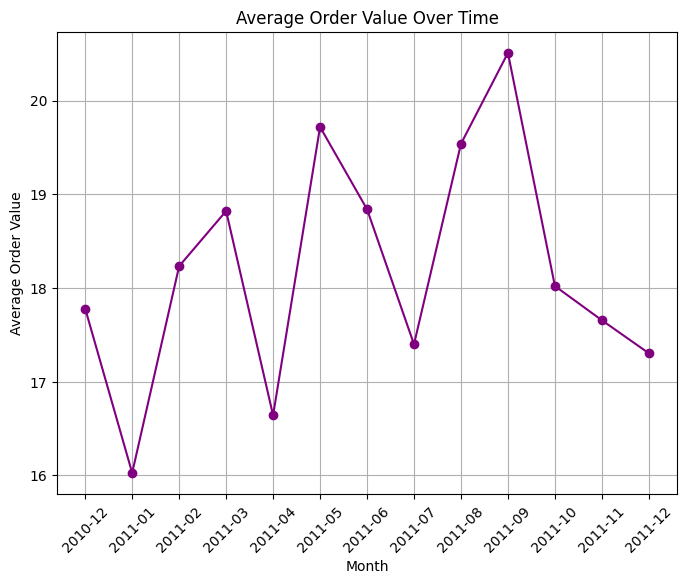

In [66]:
avg_order_value = UED.groupby(UED['InvoiceDate'].dt.to_period('M'))['sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.plot(avg_order_value['InvoiceDate'].astype(str), avg_order_value['sales'], marker='o', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.title('Average Order Value Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

There is a positive trend in the value of order values as the year gets closer to the holidays.

#### Import plotly.io and visualize sales on a world map

In [67]:
import plotly.express as px
import plotly.io as pio


In [68]:
pio.renderers.default = 'notebook_connected'

geo_sales = UED.groupby('Country')['sales'].sum().reset_index()
fig = px.choropleth(
    geo_sales, 
    locations="Country", 
    locationmode="country names",
    color="sales", 
    hover_name="Country",
    color_continuous_scale="Viridis", 
    title="Sales by Country"
)
fig.show()

This Geographic Sales Heatmap displays the countries that use the Ecommerce system throughout the world. The United Kingdom has the most buyers compared to other countries.

#### Visualizing Sales by New vs. Repeat Customers (Customer Retention)

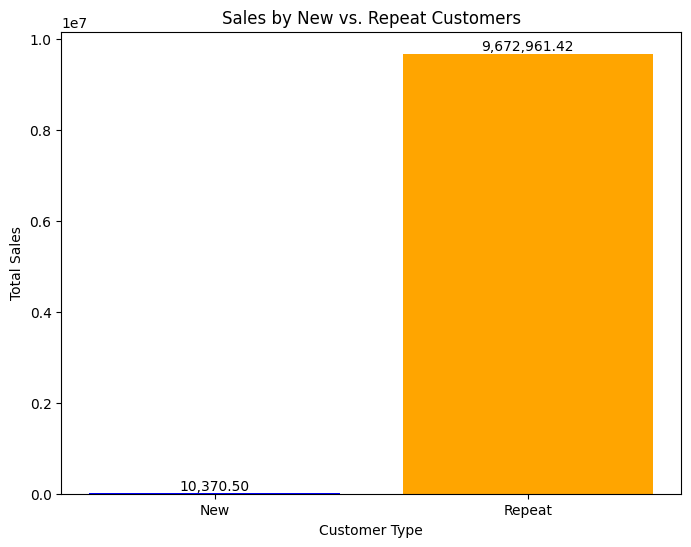

In [69]:

UED['is_repeat_customer'] = UED.duplicated(subset=['CustomerID'], keep=False)

repeat_sales = UED.groupby('is_repeat_customer')['sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(repeat_sales['is_repeat_customer'].map({True: 'Repeat', False: 'New'}), repeat_sales['sales'], color=['blue', 'orange'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Sales by New vs. Repeat Customers')
plt.show()

The bar graph above displays that most customers are repeat customers. Businesses can capitalize on this insight by implementing loyalty programs to enhance customer engagement and offer exclusive deals and rewards.